In [2]:
import pandas as pd
import re

# Read the data file
file_path = "output.txt"
data = []

with open(file_path, "r") as file:
    for line in file:
        match = re.search(r"Generation:\s+(\d+)\s+Average fitness:\s+([\d.e+-]+)\s+Best fitness:\s+([\d.e+-]+)", line)
        if match:
            generation = int(match.group(1))
            avg_fitness = float(match.group(2))
            best_fitness = float(match.group(3))
            data.append([generation, avg_fitness, best_fitness])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Generation", "Average Fitness", "Best Fitness"])

# Display the DataFrame
df.head()  # Shows the first few rows

# print the amount of generations
print(len(df))



2072


In [6]:
# Save the DataFrame to a CSV file
df.to_csv("output.csv", index=False)

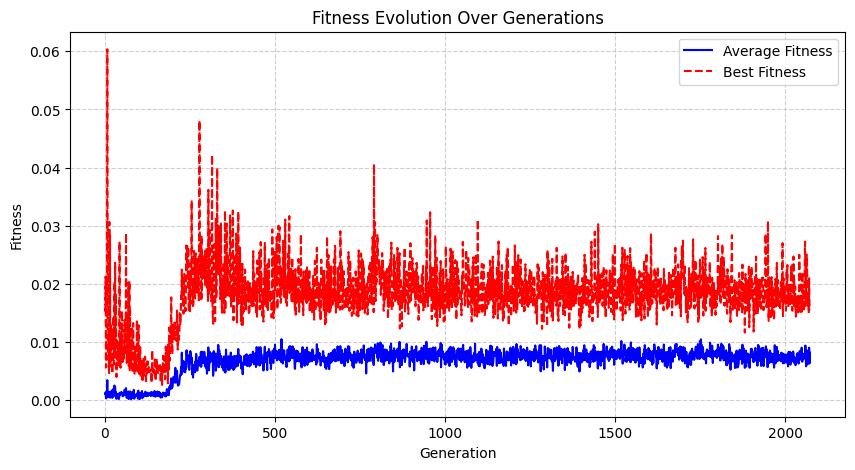

In [3]:
import matplotlib.pyplot as plt

# Plot fitness over generations
plt.figure(figsize=(10, 5))

# Plot both Average and Best fitness
plt.plot(df["Generation"], df["Average Fitness"], label="Average Fitness", linestyle="-", color="blue")
plt.plot(df["Generation"], df["Best Fitness"], label="Best Fitness", linestyle="--", color="red")

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Evolution Over Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


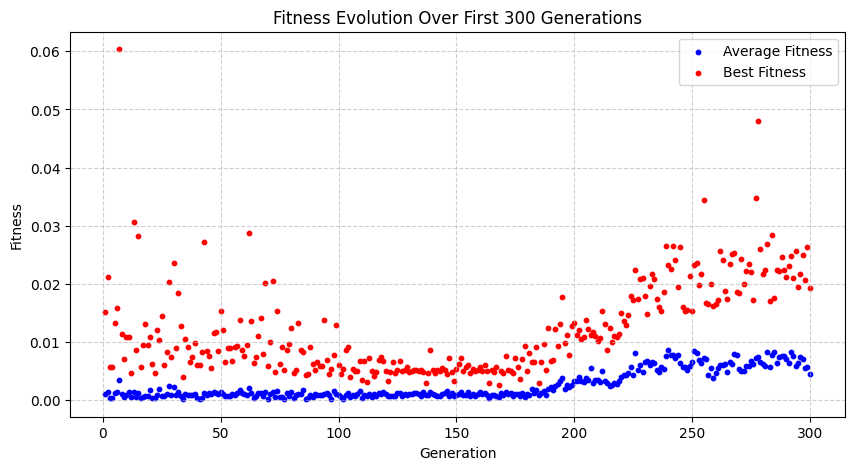

In [19]:
# only display the x generations
x = 300  # Set the number of generations to display

plt.figure(figsize=(10, 5))

# Plot Average fitness as dots
plt.scatter(df["Generation"][:x], df["Average Fitness"][:x], label="Average Fitness", color="blue", s=10)

# Plot Best fitness as dots
plt.scatter(df["Generation"][:x], df["Best Fitness"][:x], label="Best Fitness", color="red", s=10)

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title(f"Fitness Evolution Over First {x} Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


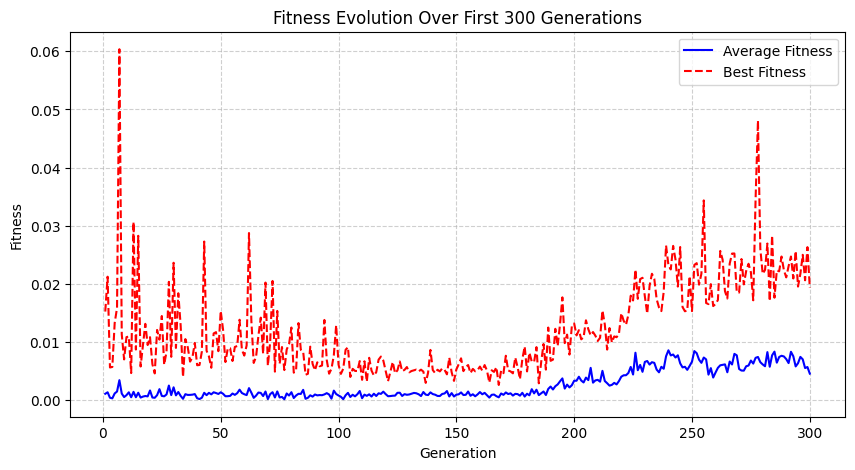

In [20]:
# only display the x generations
x = 300  # Set the number of generations to display

plt.figure(figsize=(10, 5))

# Plot Average fitness as lines
plt.plot(df["Generation"][:x], df["Average Fitness"][:x], label="Average Fitness", color="blue", linestyle="-")

# Plot Best fitness as lines
plt.plot(df["Generation"][:x], df["Best Fitness"][:x], label="Best Fitness", color="red", linestyle="--")

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title(f"Fitness Evolution Over First {x} Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


In [9]:
# Read the data files
file_paths = ["Again/1.txt", "Again/2.txt", "Again/3.txt"]

for file_path in file_paths:
    predator_data = []
    prey_data = []
    
    with open(file_path, "r") as file:
        for i, line in enumerate(file):
            match = re.search(r"Generation:\s+(\d+)\s+Average fitness:\s+([\d.e+-]+)\s+Best fitness:\s+([\d.e+-]+)", line)
            if match:
                generation = int(match.group(1))
                avg_fitness = float(match.group(2))
                best_fitness = float(match.group(3))
                if i % 2 == 0:  # Even index: predator data
                    predator_data.append([generation, avg_fitness, best_fitness])
                else:  # Odd index: prey data
                    prey_data.append([generation, avg_fitness, best_fitness])

    # Create DataFrames
    predator_df = pd.DataFrame(predator_data, columns=["Generation", "Average Fitness", "Best Fitness"])
    prey_df = pd.DataFrame(prey_data, columns=["Generation", "Average Fitness", "Best Fitness"])

    # Save the DataFrames to CSV files
    predator_df.to_csv(file_path.replace(".txt", "_predator.csv"), index=False)
    prey_df.to_csv(file_path.replace(".txt", "_prey.csv"), index=False)


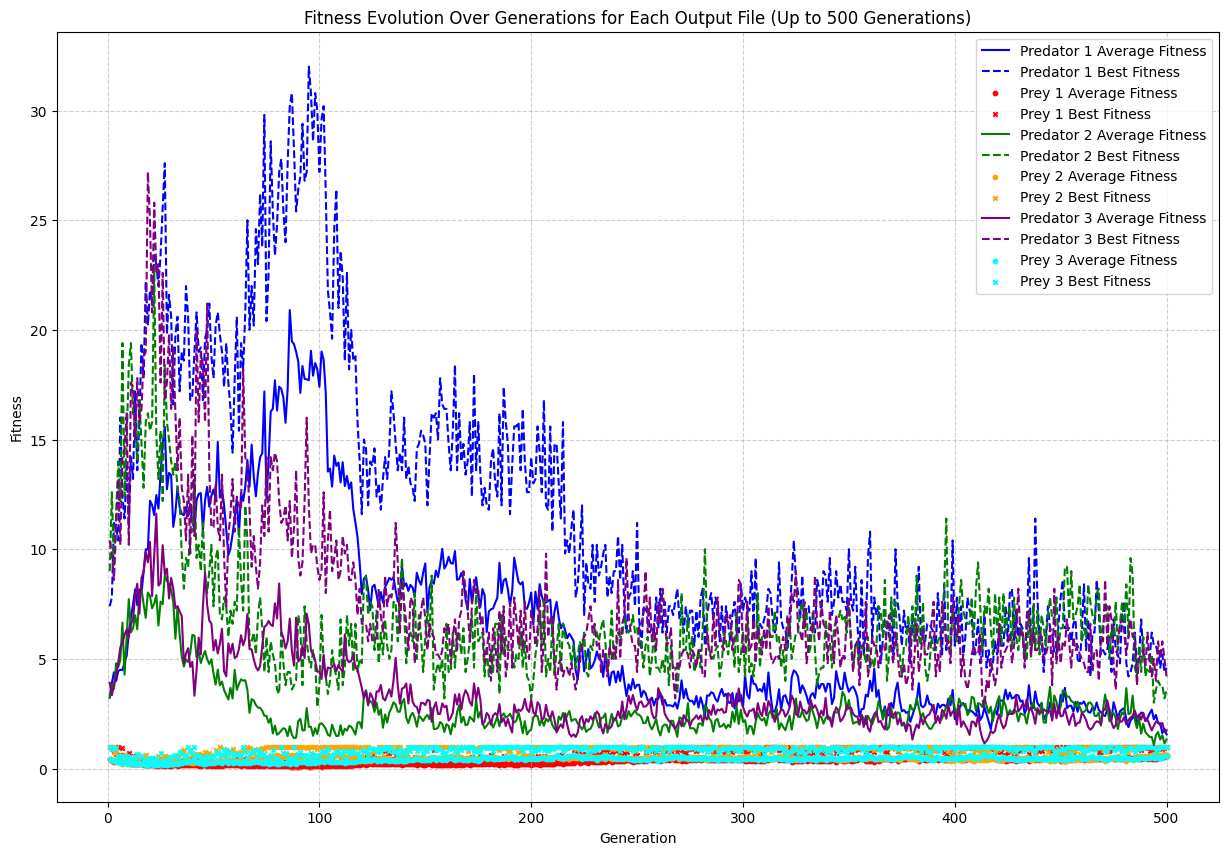

In [10]:
# load the csv files for both predator and prey for each output file
predator_dfs = []
prey_dfs = []

for file_path in file_paths:
    predator_df = pd.read_csv(file_path.replace(".txt", "_predator.csv"))
    prey_df = pd.read_csv(file_path.replace(".txt", "_prey.csv"))
    predator_dfs.append(predator_df)
    prey_dfs.append(prey_df)

# Define colors for predators and prey
predator_colors = ["blue", "green", "purple"]
prey_colors = ["red", "orange", "cyan"]

# Plot fitness over generations for each output file up to 500 generations
plt.figure(figsize=(15, 10))

for i, (predator_df, prey_df) in enumerate(zip(predator_dfs, prey_dfs)):
    # Plot Predator Average fitness
    plt.plot(predator_df["Generation"][:500], predator_df["Average Fitness"][:500], label=f"Predator {i + 1} Average Fitness", linestyle="-", color=predator_colors[i])
    # Plot Predator Best fitness
    plt.plot(predator_df["Generation"][:500], predator_df["Best Fitness"][:500], label=f"Predator {i + 1} Best Fitness", linestyle="--", color=predator_colors[i])
    # Plot Prey Average fitness
    plt.scatter(prey_df["Generation"][:500], prey_df["Average Fitness"][:500], label=f"Prey {i + 1} Average Fitness", color=prey_colors[i], s=10)
    # Plot Prey Best fitness
    plt.scatter(prey_df["Generation"][:500], prey_df["Best Fitness"][:500], label=f"Prey {i + 1} Best Fitness", color=prey_colors[i], s=10, marker='x')

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.title("Fitness Evolution Over Generations for Each Output File (Up to 500 Generations)")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


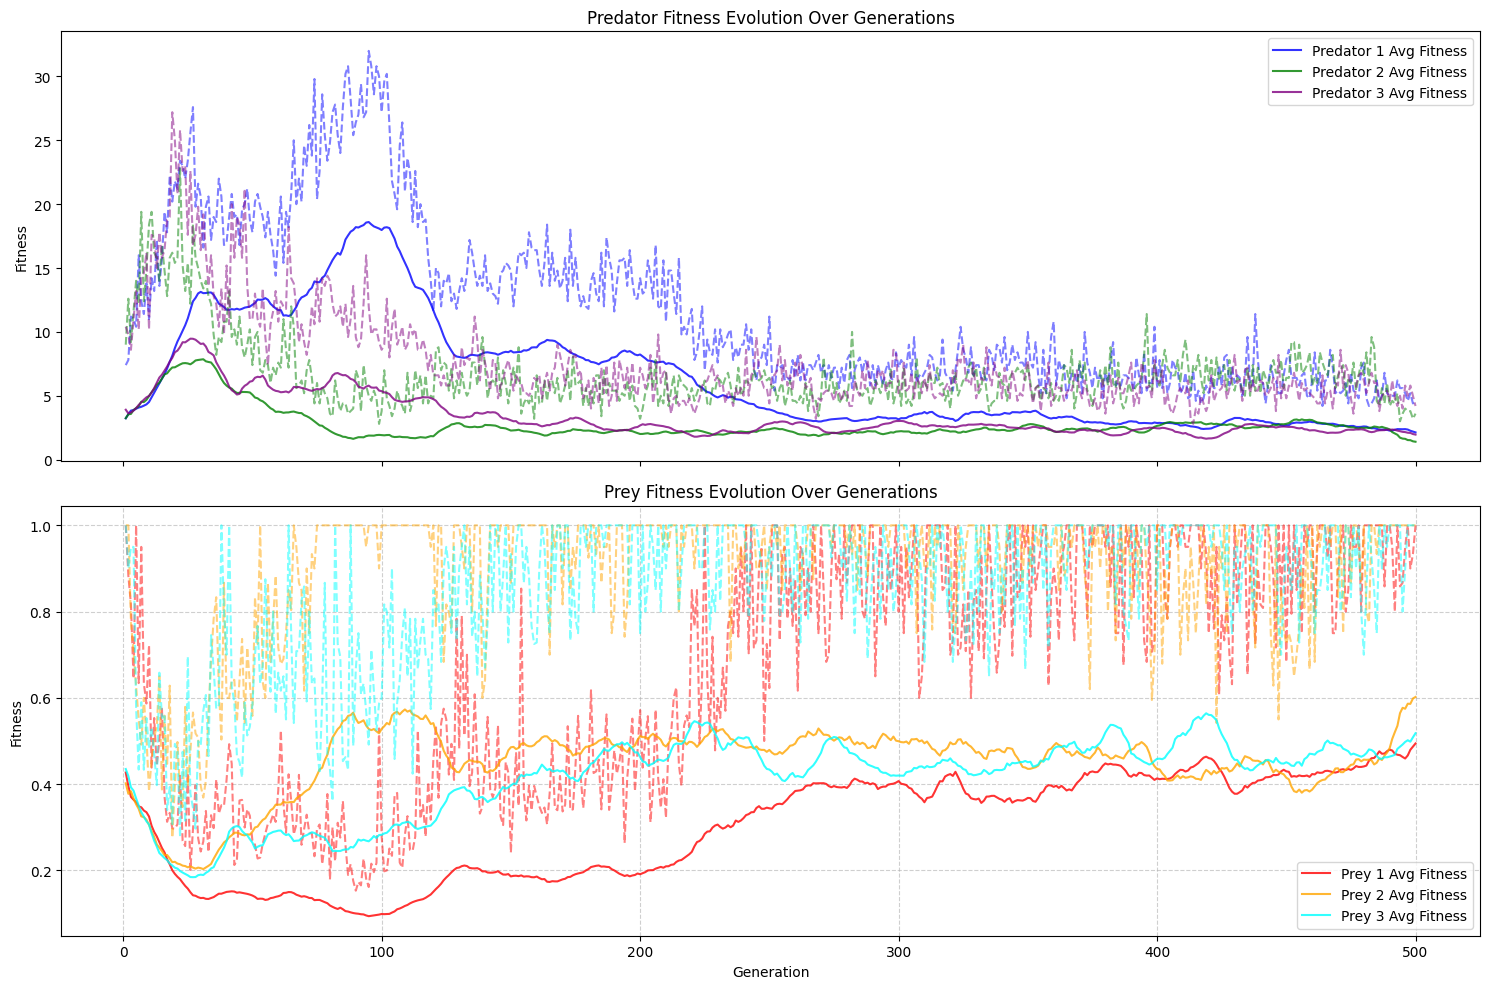

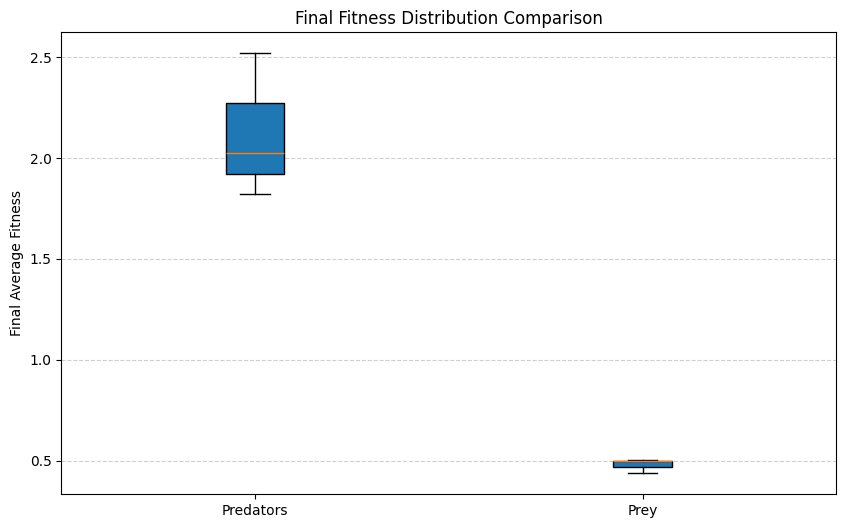

In [11]:
# cool, so i got this data, now I need to do 'Plot the fitness of each agent as a function of the generation count for both types of agent for all
# runs. Think of a good way to represent, visualise and compare your results in plots. ''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define colors for predators and prey
predator_colors = ["blue", "green", "purple"]
prey_colors = ["red", "orange", "cyan"]

# Create subplots: one for predators, one for prey
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
axes[0].set_title("Predator Fitness Evolution Over Generations")
axes[1].set_title("Prey Fitness Evolution Over Generations")

for i, (predator_df, prey_df) in enumerate(zip(predator_dfs, prey_dfs)):
    # Rolling average for smoother visualization (window=10 generations)
    predator_df["Smoothed Avg Fitness"] = predator_df["Average Fitness"].rolling(window=10, min_periods=1).mean()
    prey_df["Smoothed Avg Fitness"] = prey_df["Average Fitness"].rolling(window=10, min_periods=1).mean()
    
    # Plot predator fitness
    axes[0].plot(predator_df["Generation"][:500], predator_df["Smoothed Avg Fitness"][:500],
                 label=f"Predator {i + 1} Avg Fitness", linestyle="-", color=predator_colors[i], alpha=0.8)
    axes[0].plot(predator_df["Generation"][:500], predator_df["Best Fitness"][:500],
                 linestyle="--", color=predator_colors[i], alpha=0.5)
    
    # Plot prey fitness
    axes[1].plot(prey_df["Generation"][:500], prey_df["Smoothed Avg Fitness"][:500],
                 label=f"Prey {i + 1} Avg Fitness", linestyle="-", color=prey_colors[i], alpha=0.8)
    axes[1].plot(prey_df["Generation"][:500], prey_df["Best Fitness"][:500],
                 linestyle="--", color=prey_colors[i], alpha=0.5)

# Labels
axes[1].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[1].set_ylabel("Fitness")
axes[0].legend()
axes[1].legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Box plot of final fitness distributions
plt.figure(figsize=(10, 6))
predator_final_fitness = [df["Average Fitness"].iloc[-1] for df in predator_dfs]
prey_final_fitness = [df["Average Fitness"].iloc[-1] for df in prey_dfs]
plt.boxplot([predator_final_fitness, prey_final_fitness], labels=["Predators", "Prey"], patch_artist=True)
plt.title("Final Fitness Distribution Comparison")
plt.ylabel("Final Average Fitness")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
